In [22]:
# ============================================================
# ANALYSE COMPARATIVE DES OUTLIERS — PROJET FRAMINGHAM
# Module demandé par l'encadreur
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ----------------------
# 1. Charger la base brute
# ----------------------
df = pd.read_csv("C:/Users/YOGA Slim/Documents/GitHub/projet-maladie-cardiaque-IA/BASES_Données/BASE_EDA/FRAMINGANG.csv", sep=";"       )
  
print(df.shape)
print(df.info())
print(df.head())

(4239, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239 entries, 0 to 4238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   float64
 1   age              4238 non-null   float64
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   float64
dtypes: float64(16)
memory usage: 530.0 KB
None
   mal

In [23]:
df = df.rename(columns={
    "male": "sexe",
    "age": "age",
    "education": "niveau_etude",
    "currentSmoker": "fumeur",
    "cigsPerDay": "cigarettes_par_jour",
    "BPMeds": "traitement_hypertenseur",
    "prevalentStroke": "antecedent_avc",
    "prevalentHyp": "hypertension",
    "diabetes": "diabete",
    "totChol": "cholesterol_total",
    "sysBP": "tension_sys",
    "diaBP": "tension_dia",
    "BMI": "imc",
    "heartRate": "frequence_cardiaque",
    "glucose": "glucose",
    "TenYearCHD": "maladie_cardiaque_10ans"
})


In [24]:
#definir les variables quantitative 
quantitative_vars = [
    "age",
    "cigarettes_par_jour",
    "cholesterol_total",
    "tension_sys",
    "tension_dia",
    "imc",
    "frequence_cardiaque",
    "glucose"
]


In [25]:
detection_outliers = {} 
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper


In [26]:
results = {}

for col in quantitative_vars:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    results[col] = {
        "n_outliers": len(outliers),
        "lower_IQR": round(lower, 2),
        "upper_IQR": round(upper, 2)
    }

df_outlier_summary = pd.DataFrame(results).T
print(df_outlier_summary)


                     n_outliers  lower_IQR  upper_IQR
age                         0.0      21.00      77.00
cigarettes_par_jour        12.0     -30.00      50.00
cholesterol_total          56.0     120.50     348.50
tension_sys               126.0      76.50     184.50
tension_dia                81.0      52.69     112.19
imc                        97.0      15.62      35.49
frequence_cardiaque        76.0      45.50     105.50
glucose                   188.0      47.00     111.00


In [27]:
#savoir si les outliers appartiennent à des sous-groupes spécifiques
df["age_cat"] = pd.cut(df["age"], bins=[0, 40, 60, 80, 120],
                       labels=["<40", "40-60", "60-80", ">80"])

subgroups = ["age_cat", "sexe", "diabete", "hypertension"]

for col in quantitative_vars:
    outliers, lower, upper = detect_outliers_iqr(df, col)

    print(f"\n====== OUTLIERS POUR : {col} ======")

    for group in subgroups:
        print(f"\n>> Répartition des outliers selon {group} :")
        print(outliers[group].value_counts())



====== OUTLIERS POUR : age ======

>> Répartition des outliers selon age_cat :
age_cat
<40      0
40-60    0
60-80    0
>80      0
Name: count, dtype: int64

>> Répartition des outliers selon sexe :
Series([], Name: count, dtype: int64)

>> Répartition des outliers selon diabete :
Series([], Name: count, dtype: int64)

>> Répartition des outliers selon hypertension :
Series([], Name: count, dtype: int64)

====== OUTLIERS POUR : cigarettes_par_jour ======

>> Répartition des outliers selon age_cat :
age_cat
40-60    8
<40      3
60-80    1
>80      0
Name: count, dtype: int64

>> Répartition des outliers selon sexe :
sexe
1.0    12
Name: count, dtype: int64

>> Répartition des outliers selon diabete :
diabete
0.0    12
Name: count, dtype: int64

>> Répartition des outliers selon hypertension :
hypertension
0.0    7
1.0    5
Name: count, dtype: int64

====== OUTLIERS POUR : cholesterol_total ======

>> Répartition des outliers selon age_cat :
age_cat
40-60    43
60-80    12
<40       1


In [28]:
#Identifier les valeurs manquantes

# Pourcentage de valeurs manquantes par variable
na_percent = df.isnull().mean().round(3) * 100
na_percent = na_percent.sort_values(ascending=False)

print("Pourcentage de valeurs manquantes (%):")
print(na_percent)


Pourcentage de valeurs manquantes (%):
glucose                    9.2
niveau_etude               2.5
traitement_hypertenseur    1.3
cholesterol_total          1.2
cigarettes_par_jour        0.7
imc                        0.5
sexe                       0.0
fumeur                     0.0
age                        0.0
diabete                    0.0
hypertension               0.0
antecedent_avc             0.0
tension_sys                0.0
tension_dia                0.0
frequence_cardiaque        0.0
maladie_cardiaque_10ans    0.0
age_cat                    0.0
dtype: float64


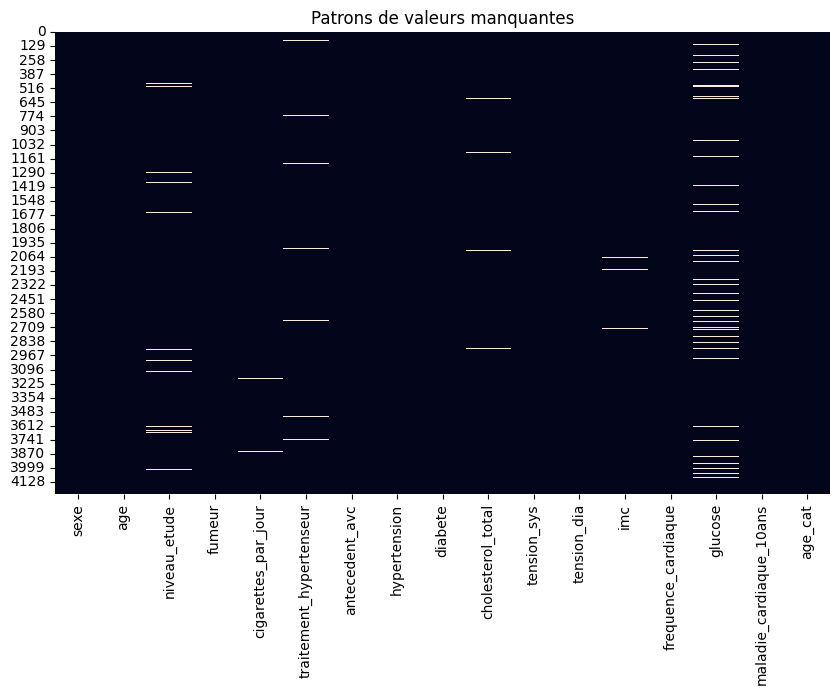

In [29]:
#Visualisation (heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Patrons de valeurs manquantes")
plt.show()


In [30]:
#Analyse des valeurs manquantes par sous-groupe
df["glucose_na"] = df["glucose"].isnull().astype(int)

print("NA glucose selon l'âge :")
print(df.groupby("age_cat")["glucose_na"].mean()*100)

print("\nNA glucose selon le sexe :")
print(df.groupby("sexe")["glucose_na"].mean()*100)

print("\nNA glucose selon le diabete :")
print(df.groupby("diabete")["glucose_na"].mean()*100)

print("\nNA glucose selon l'hypertension :")
print(df.groupby("hypertension")["glucose_na"].mean()*100)


NA glucose selon l'âge :
age_cat
<40      9.383378
40-60    9.440439
60-80    7.426598
>80           NaN
Name: glucose_na, dtype: float64

NA glucose selon le sexe :
sexe
0.0    11.285655
1.0     6.322155
Name: glucose_na, dtype: float64

NA glucose selon le diabete :
diabete
0.0    9.300073
1.0    3.669725
Name: glucose_na, dtype: float64

NA glucose selon l'hypertension :
hypertension
0.0    9.445585
1.0    8.510638
Name: glucose_na, dtype: float64


C:\Users\YOGA Slim\AppData\Local\Temp\ipykernel_26856\1437928628.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("age_cat")["glucose_na"].mean()*100)
